In [2]:
import pandas as pd
import glob
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)
import warnings
warnings.filterwarnings("ignore")

### Plotting the Daily DHI

In [15]:
path = r'/Users/sara/Desktop/study/growsquares/data' # use your path
all_files = glob.glob(path + "/*.csv")

ls = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=2)
    ls.append(df)

dhi_df = pd.concat(ls, axis=0, ignore_index=True)

In [16]:
# cleaning data - cleaning col names, configuring to daily data instead of 30 min 

dhi_df['datetime'] = pd.to_datetime(dhi_df.iloc[:,0:5])

#dhi_df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute'], axis=1, inplace=True)

dhi_df.columns = dhi_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

dhi_df.set_index('datetime', inplace = True)

dhi = dhi_df.dhi.resample(rule='D').mean()

dhi.dropna(inplace=True)

In [17]:
dhi_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87600 entries, 1998-01-01 00:00:00 to 2015-12-31 23:30:00
Data columns (total 18 columns):
year                  87600 non-null int64
month                 87600 non-null int64
day                   87600 non-null int64
hour                  87600 non-null int64
minute                87600 non-null int64
dhi                   87600 non-null int64
dni                   87600 non-null int64
ghi                   87600 non-null int64
cloud_type            85777 non-null float64
dew_point             87600 non-null int64
solar_zenith_angle    87600 non-null float64
surface_albedo        87600 non-null float64
wind_speed            87600 non-null float64
precipitable_water    87600 non-null float64
wind_direction        87600 non-null float64
relative_humidity     87600 non-null float64
temperature           87600 non-null int64
pressure              87600 non-null float64
dtypes: float64(8), int64(10)
memory usage: 12.7 MB


size: 87600 obs * 18 features

Has record of every 30 min for 5 years between 1998 and 2017.

Has chunks of years missing for 1999, and through 2001 till 2014.

In [18]:
dhi_df.head()

,year,month,day,hour,minute,dhi,dni,ghi,cloud_type,dew_point,solar_zenith_angle,surface_albedo,wind_speed,precipitable_water,wind_direction,relative_humidity,temperature,pressure
datetime,,,,,,,,,,,,,,,,,,
1998-01-01 00:00:00,1998,1,1,0,0,0,0,0,0.0,-12,162.24,0.0,2.5,0.219,309.6,78.77,-9,1020.0
1998-01-01 00:30:00,1998,1,1,0,30,0,0,0,0.0,-12,161.09,0.0,2.5,0.219,309.6,78.81,-9,1020.0
1998-01-01 01:00:00,1998,1,1,1,0,0,0,0,0.0,-13,158.12,0.0,2.5,0.219,307.6,76.14,-10,1020.0
1998-01-01 01:30:00,1998,1,1,1,30,0,0,0,0.0,-13,153.94,0.0,2.5,0.216,307.6,76.16,-10,1020.0
1998-01-01 02:00:00,1998,1,1,2,0,0,0,0,0.0,-13,149.06,0.0,2.5,0.213,306.6,80.40,-10,1020.0


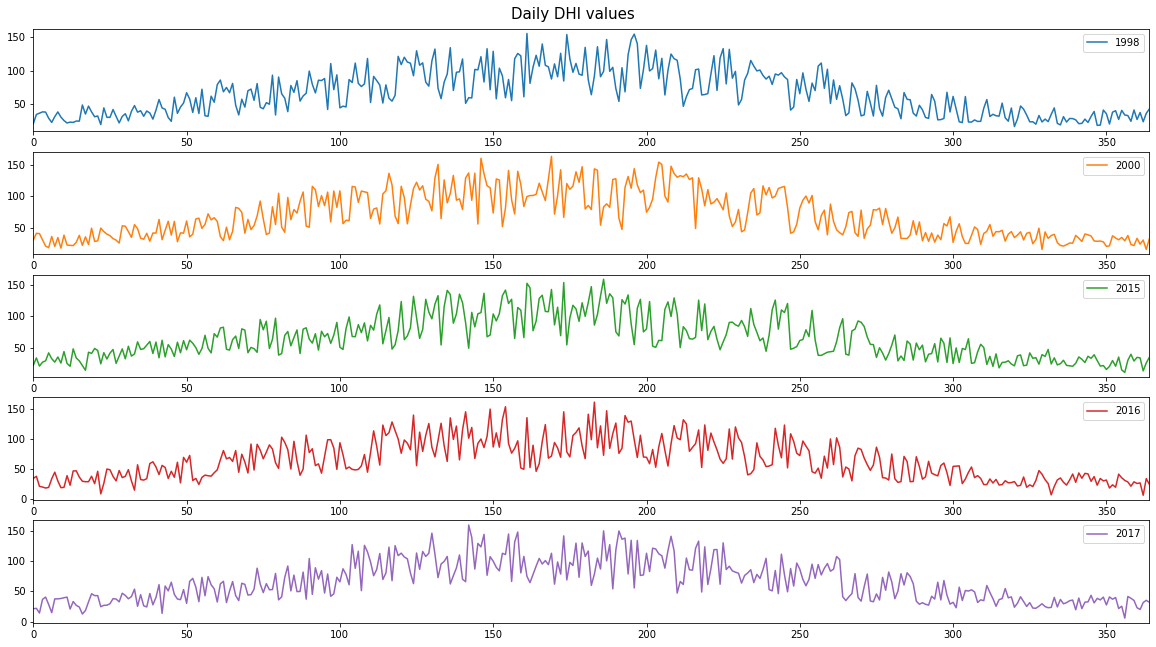

In [19]:
# plotting Daily GHI for each year

groups = dhi.groupby(pd.Grouper(freq='Y'))

years = pd.DataFrame()
for name, group in groups:
    if name.year in [1998, 2000, 2015, 2016, 2017]:
        years[name.year] = group.values
        
fig, ax = plt.subplots(figsize=(20, 10))
years.plot(subplots=True, ax = ax)
plt.suptitle('Daily DHI values', fontsize = 15)
plt.subplots_adjust(top=0.95)
plt.show()

In [20]:
# max dhi month
years.idxmax()/30

1998    5.366667
2000    5.633333
2015    6.200000
2016    6.100000
2017    4.733333
dtype: float64

In [21]:
# min dhi month
years.idxmin()/30

1998    10.666667
2000    10.966667
2015    11.866667
2016    12.066667
2017    11.866667
dtype: float64

In [22]:
years.describe()

,1998,2000,2015,2016,2017
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,66.204566,69.818721,65.776370,64.154623,66.637671
std,33.493940,36.136031,33.465464,33.012072,33.843648
min,17.041667,15.854167,11.250000,5.833333,5.687500
25%,36.687500,39.000000,39.750000,35.770833,37.729167
50%,60.000000,60.520833,59.666667,56.812500,61.791667
75%,91.625000,100.375000,86.541667,86.333333,88.125000
max,155.437500,163.291667,158.541667,160.791667,159.812500


Based on the plot and statistics, there is definitely seasonality in DHI as one would expect.
We see that DHI is highest around May and June and lowest around late October to Late November.

Even though there are gaps in years in the data (we do not have 1999 or data in 2001 to 2014),
we do not see apparent changes in trend, the mean dhi seems to stay the same throughout the years.

### Predicting DHI

The goal is to predict DHI, a continuous value, the problem is a supervised regression problem. I initially thought of SARIMA models as the data clearly had seasonality but it is a pretty time consuming model to tune. Moreover, there is a similar but a much easier model on Facebook’s fbprophet so I decided to start out with it. I used the daily data as hourly data took too long.

### 1. Fb Prophet

seasonal modeling provided by Facebook called FB Prophet.
forecasting model

**An additive model that fits probabilistic models on A yearly seasonal component modeled using Fourier series and A weekly seasonal component using dummy variables.**

**Under the hood uses Stan which is the framework for probabilistic modeling. used to specify a (Bayesian) statistical model** 

FB prophet **only does 1D forecasting** 




In [23]:
from fbprophet import Prophet
fb_dhi = pd.DataFrame(dhi).reset_index()
fb_dhi.columns = ['ds', 'y']
m = Prophet(
           ).add_seasonality('yearly', period = 365.25, fourier_order = 200
           ).add_seasonality('weekly', period = 7, fourier_order = 5)
m.fit(fb_dhi[:1460])
forecast = m.predict(fb_dhi)

INFO:fbprophet:Found custom seasonality named "yearly", disabling built-in yearly seasonality.
INFO:fbprophet:Found custom seasonality named "weekly", disabling built-in weekly seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


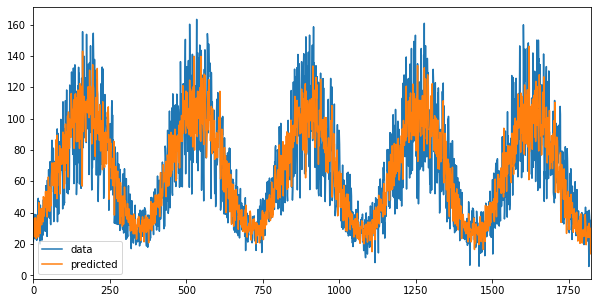

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
fb_dhi.y.plot(ax = ax, label='data')
forecast.yhat.plot(ax = ax, label='predicted')
ax.legend()

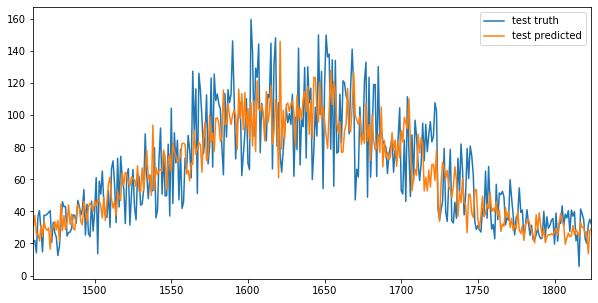

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
fb_dhi[fb_dhi.ds >= '2017-01-01'].y.plot(ax = ax, label='test truth')
forecast[forecast.ds >= '2017-01-01'].yhat.plot(ax = ax, label='test predicted')
ax.legend()

Above graph is the predicted dhi of our test set which is the 2017 data.

I have trained the model with daily data before 2017 (1460 data points, 80% of the data), and made predictions for the year 2017.

There are less variation in the predictions compared to the truth values. 
Flexibility can be tuned with fourier_order. Considering fourier order of 10 is a typical default value for seasonality on the scale of a year, 200 is already a flexible model. 
Higher values will likely cause overfitting and it seems to well capture the yearly seasonal trend of our data.

In [26]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, horizon = '365 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-01-01 00:00:00 and 2016-01-01 00:00:00


In [27]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.mean()

# coverage: coverage of the yhat_lower and yhat_upper estimates

horizon     203 days 18:00:00
mse                   926.539
rmse                  30.3085
mae                   24.0244
mape                 0.453774
coverage             0.472228
dtype: object

### 2. XGBoost

**Optimized Gradient Boosting**

Decision-tree-based ensemble algorithm that uses a gradient boosting framework

apply the principle of boosting weak learners

One of the most used algorithms in data science competitions for its prediction performance

Since our data does not have a decreasing/increasing trend over time, I think it is a good idea to try random forest model. 
They are also easy and fast to train.
They do require feature engineering and I will add lag of the target variable. I decided to add lag from 1 steps back up to 12 based on the acf plot and pacf plot. 
Lastly, I will remove variables in the data that is dependent upon time.

In [58]:
# Adding more time series features from datetime index
dhi_df['quarter'] = dhi_df.index.quarter
dhi_df['dayofyear'] = dhi_df.index.dayofyear
dhi_df['weekofyear'] = dhi_df.index.weekofyear

In [31]:
# train test split

split_date = '01-01-2017'

In [32]:
dhi_copy = dhi_df.copy()
for i in range(1, 12):
        dhi_copy["lag_{}".format(i)] = dhi_copy.dhi.shift(i)

In [33]:
lag_col = [col for col in dhi_copy if col.startswith('lag')]

In [34]:
X = dhi_copy[['year', 'month', 'day', 'hour', 'minute', 'quarter', 'dayofyear', 'weekofyear'] + lag_col]
y = dhi_copy.dhi

In [35]:
X_train, X_test = X.loc[dhi_df.index < split_date].sort_index(), \
X.loc[X.index >= split_date].sort_index()
y_train, y_test = y.loc[dhi_df.index < split_date].sort_index(), \
y.loc[dhi_df.index >= split_date].sort_index()

In [36]:
# how the data looks
X.sample(3)

,year,month,day,hour,minute,quarter,dayofyear,weekofyear,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11
datetime,,,,,,,,,,,,,,,,,,,
2015-04-20 06:30:00,2015,4,20,6,30,2,110,17,39.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998-09-28 01:30:00,1998,9,28,1,30,3,271,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-08 08:30:00,2017,7,8,8,30,3,189,27,235.0,174.0,162.0,120.0,68.0,47.0,22.0,0.0,0.0,0.0,0.0


In [37]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [45]:
reg = xgb.XGBRegressor(objective ='reg:linear', max_depth = 5, n_estimators=1000)
reg.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=100,
       verbose=False)

[16:24:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

day of the year and hour is the most important feature least important was quarter.

In [53]:
dhi_test = dhi_df.loc[dhi_df.index >= split_date]
dhi_train = dhi_df.loc[dhi_df.index < split_date]

In [55]:
dhi_test['dhi_prediction'] = reg.predict(X_test)
dhi_all = pd.concat([dhi_test, dhi_train], sort=False)
grouped = dhi_all.groupby(pd.Grouper(freq='D'))['dhi','dhi_prediction'].mean()

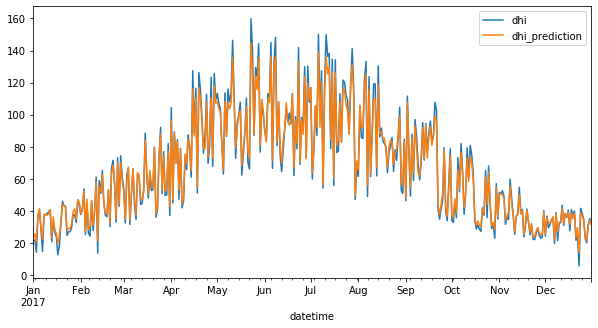

In [56]:
grouped = grouped[['dhi','dhi_prediction']][grouped.index >= '2017-01-01 00:00:00']
pd.plotting.register_matplotlib_converters()
_ = grouped.plot(figsize=(10, 5))

In [63]:
print('rmse: {}'.format(np.sqrt(mean_squared_error(y_true=dhi_test.dhi, 
                                          y_pred=dhi_test['dhi_prediction']))))
print('mae: {}'.format(mean_absolute_error(y_true=dhi_test['dhi'],
                   y_pred=dhi_test['dhi_prediction'])))


rmse: 35.20294720087554
mae: 15.011582543328405


**Two model comparison** 

I have chose to look at RMSE and MAE since we can penalize large errors more with RMSE but MAE is more interpretable. The Xgboost has a lower MAE but higher RMSE. Since there was not a big difference in RMSE and also based on the graph, I would say Xgboost is the better model and focus more on improving the performance. It can be improved by removing seasonality before making predictions.
Also, we can tune parameters to improve and fully leverage its advantages over other algorithms.